## Exercises

Answer the  following questions.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

stocks_filename = 'stocks_data.csv'
stocks_df = pd.read_csv(stocks_filename)

### Q1: What is the maximum intra-day price change in nominal terms in this dataset?

In [3]:
(stocks_df.open - stocks_df.close).max()

138.75

### Q2: Which ticker had this price change and when?

In [4]:
stocks_df.iloc[(stocks_df.open - stocks_df.close).idxmax()]

ticker                                      AIG
open                                    1918.75
close                                      1780
adj_close                               1356.67
low                                        1760
high                                       1920
volume                                   619200
date                                 2001-01-04
exchange                                   NYSE
name         AMERICAN INTERNATIONAL GROUP, INC.
industry             PROPERTY-CASUALTY INSURERS
Name: 71289, dtype: object

### Q3: How many companies have experienced closing at a price 5 or higher than their open?

In [5]:
stocks_df[stocks_df.close - stocks_df.open > 5].ticker.unique().size

279

### Q4: How many companies have traded at an `adj_close` between 20 and 21?

In [6]:
stocks_df[(stocks_df.adj_close > 20) & (stocks_df.adj_close < 21)].ticker.unique().size

455

### Q5: How can you select the 10th row of `stocks_df` in one line without using `loc` or `iloc`? Find at least 3 different ways.

In [8]:
stocks_df[9:10]

,ticker,open,close,adj_close,low,high,volume,date,exchange,name,industry
9,AAPL,0.633929,0.633929,0.02863,0.633929,0.636161,13893600,1980-12-26,NASDAQ,APPLE INC.,COMPUTER MANUFACTURING


In [9]:
stocks_df[stocks_df.index == 9]

,ticker,open,close,adj_close,low,high,volume,date,exchange,name,industry
9,AAPL,0.633929,0.633929,0.02863,0.633929,0.636161,13893600,1980-12-26,NASDAQ,APPLE INC.,COMPUTER MANUFACTURING


In [10]:
stocks_df.values[9]

array(['AAPL', 0.633928596973419, 0.633928596973419, 0.0286301076412201,
       0.633928596973419, 0.6361607313156129, 13893600, '1980-12-26',
       'NASDAQ', 'APPLE INC.', 'COMPUTER MANUFACTURING'], dtype=object)

### Q6: Create a histogram of the number of observations for each exchange.

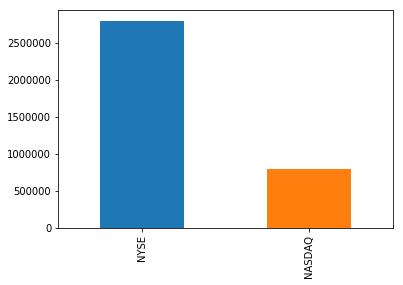

In [19]:
stocks_df.exchange.value_counts().plot(kind='bar')

### Q7: How many companies' ticker contain 3 or more letters?

Hint: Use the `drop_duplicates` method of a Series.

In [68]:
(stocks_df.ticker.drop_duplicates().str.len() >= 3).sum()

433

### Q8: Create a Series which contains the first word of each company's name.

In [26]:
stocks_df.name.str.split(expand=True)[0]

0            APPLE
1            APPLE
2            APPLE
3            APPLE
4            APPLE
5            APPLE
6            APPLE
7            APPLE
8            APPLE
9            APPLE
10           APPLE
11           APPLE
12           APPLE
13           APPLE
14           APPLE
15           APPLE
16           APPLE
17           APPLE
18           APPLE
19           APPLE
20           APPLE
21           APPLE
22           APPLE
23           APPLE
24           APPLE
25           APPLE
26           APPLE
27           APPLE
28           APPLE
29           APPLE
            ...   
3597506    MONSTER
3597507    MONSTER
3597508    MONSTER
3597509    MONSTER
3597510    MONSTER
3597511    MONSTER
3597512    MONSTER
3597513    MONSTER
3597514    MONSTER
3597515    MONSTER
3597516    MONSTER
3597517    MONSTER
3597518    MONSTER
3597519    MONSTER
3597520    MONSTER
3597521    MONSTER
3597522    MONSTER
3597523    MONSTER
3597524    MONSTER
3597525    MONSTER
3597526    MONSTER
3597527    M

### Q9: Classify the percentage difference between the `close` and `open` for each observation as large if it is greater or equal to 3% and small otherwise.

In [75]:
# Approach 1
def difference_classifier(difference):
    if difference > 0.03:
        return 'Large'
    else:
        return 'Small'

(stocks_df.close / stocks_df.open - 1).abs().map(difference_classifier)

0          Small
1          Small
2          Small
3          Small
4          Small
5          Small
6          Small
7          Small
8          Small
9          Small
10         Small
11         Small
12         Small
13         Small
14         Small
15         Small
16         Small
17         Small
18         Small
19         Small
20         Small
21         Small
22         Small
23         Small
24         Small
25         Small
26         Small
27         Small
28         Small
29         Small
           ...  
3597506    Small
3597507    Small
3597508    Small
3597509    Small
3597510    Small
3597511    Small
3597512    Small
3597513    Small
3597514    Small
3597515    Small
3597516    Small
3597517    Small
3597518    Small
3597519    Small
3597520    Small
3597521    Small
3597522    Small
3597523    Small
3597524    Small
3597525    Small
3597526    Small
3597527    Small
3597528    Small
3597529    Small
3597530    Small
3597531    Small
3597532    Small
3597533    Sma

In [76]:
# Approach 2
mapping = {True: 'Large', False: 'Small'}

((stocks_df.close / stocks_df.open - 1).abs() > 0.03).map(mapping)

0          Small
1          Small
2          Small
3          Small
4          Small
5          Small
6          Small
7          Small
8          Small
9          Small
10         Small
11         Small
12         Small
13         Small
14         Small
15         Small
16         Small
17         Small
18         Small
19         Small
20         Small
21         Small
22         Small
23         Small
24         Small
25         Small
26         Small
27         Small
28         Small
29         Small
           ...  
3597506    Small
3597507    Small
3597508    Small
3597509    Small
3597510    Small
3597511    Small
3597512    Small
3597513    Small
3597514    Small
3597515    Small
3597516    Small
3597517    Small
3597518    Small
3597519    Small
3597520    Small
3597521    Small
3597522    Small
3597523    Small
3597524    Small
3597525    Small
3597526    Small
3597527    Small
3597528    Small
3597529    Small
3597530    Small
3597531    Small
3597532    Small
3597533    Sma